# XGBoost

This file follows a tutoring at [Machine Learning Mastery](https://machinelearningmastery.com/extreme-gradient-boosting-ensemble-in-python/). XGBoost is an algorithm and an open-source implementation of that algorithm. It is a fast implementation of gradient boosting and became popular on Kaggle.

In [4]:
import xgboost
xgboost.__version__

'1.7.5'

In [ ]:
## XGBoost for Classification

In [5]:
# Start with a synthetic dataset
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
print(X.shape, y.shape)

(1000, 20) (1000,)


In [9]:
# More imports
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier

# Basic classifier model
model = XGBClassifier()
# 10-fold cross-validation with 3 repeats
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# Performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.925 (0.028)


In [14]:
# Prediction for classification
from numpy import asarray

# Basic model
model = XGBClassifier()
model.fit(X, y)
# The instance to predict
row = [0.2929949,-4.21223056,-1.288332,-2.17849815,-0.64527665,2.58097719,0.28422388,-7.1827928,-1.91211104,2.73729512,0.81395695,3.96973717,-2.66939799,3.34692332,4.19791821,0.99990998,-0.30201875,-4.43170633,-2.82646737,0.44916808]
row = asarray([row])
yhat = model.predict(row)
print('Predicted Class: %d' % yhat[0])

Predicted Class: 1


## XGBoost for Regression

In [19]:
# Make dataset
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=7)
print(X.shape, y.shape)

(1000, 20) (1000,)


In [20]:
# evaluate xgboost ensemble for regression
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor

# Model
model = XGBRegressor()
# 10-fold cross-validation with 3 repeats
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -76.447 (3.859)


In [22]:
# Make a prediction
from numpy import asarray

# Model
model = XGBRegressor()
model.fit(X, y)
# Row to predict
row = [0.20543991,-0.97049844,-0.81403429,-0.23842689,-0.60704084,-0.48541492,0.53113006,2.01834338,-0.90745243,-1.85859731,-1.02334791,-0.6877744,0.60984819,-0.70630121,-1.29161497,1.32385441,1.42150747,1.26567231,2.56569098,-0.11154792]
row = asarray([row])
yhat = model.predict(row)
print('Prediction: %d' % yhat[0])

Prediction: 50


## Number of trees

In [23]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from matplotlib import pyplot

In [24]:
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
    return X, y

In [26]:
def get_models():
    models = dict()
    trees = [10, 50, 100, 500, 1000, 5000]
    for n in trees:
        models[str(n)] = XGBClassifier(n_estimators=n) # n_estimators is the number of trees
    return models

In [27]:
def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

In [28]:
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>10 0.885 (0.029)
>50 0.915 (0.029)
>100 0.925 (0.028)
>500 0.927 (0.028)
>1000 0.926 (0.028)
>5000 0.925 (0.027)


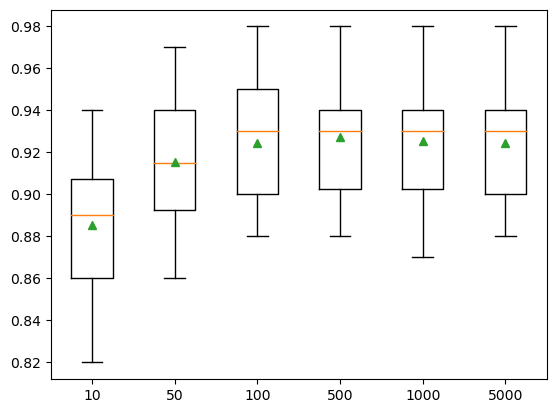

In [29]:
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

## Tree Depth

In AdaBoost, trees can be too shallow and general, while too specialized, deep, and prone to overfitting like in bootstrap aggregation. Gradient boosting strikes a balance. Set by the ```max_depth``` parameter (default value ```6```).

In [30]:
# Imports. Most are already here, but re-importing them if starting a run from this cell.
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from matplotlib import pyplot

In [31]:
# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
    return X, y

# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(1,11):
        models[str(i)] = XGBClassifier(max_depth=i)
    return models

# evaluate a give model using cross-validation
def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>1 0.849 (0.028)
>2 0.906 (0.032)
>3 0.926 (0.027)
>4 0.930 (0.027)
>5 0.924 (0.031)
>6 0.925 (0.028)
>7 0.926 (0.030)
>8 0.926 (0.029)
>9 0.921 (0.032)
>10 0.923 (0.035)


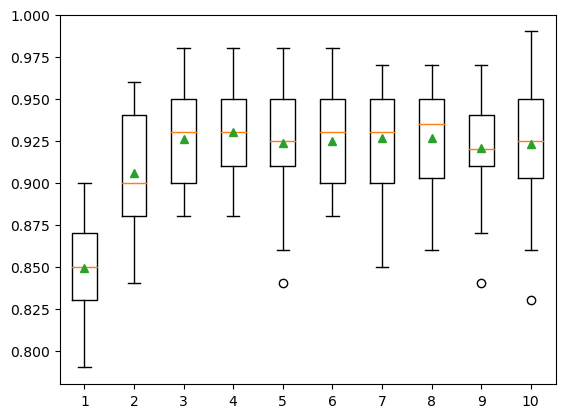

In [32]:
# Ploting. Look like a max depth of 4 might be the best, in contrast to the default value of 6.
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# Learning Rate

The learning rate is the parameter ```eta```, which has a default value of ```0.3```.

In [33]:
# Imports
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from matplotlib import pyplot

In [34]:
# List of models.
def get_models():
    models = dict()
    rates = [0.0001, 0.001, 0.01, 0.1, 1.0]
    for r in rates:
        key = '%.4f' % r
        models[key] = XGBClassifier(eta=r)
    return models

In [35]:
# evaluate a give model using cross-validation
def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

In [36]:
# Dataset
X, y = get_dataset()

models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>0.0001 0.804 (0.039)
>0.0010 0.814 (0.037)
>0.0100 0.867 (0.027)
>0.1000 0.923 (0.030)
>1.0000 0.913 (0.030)


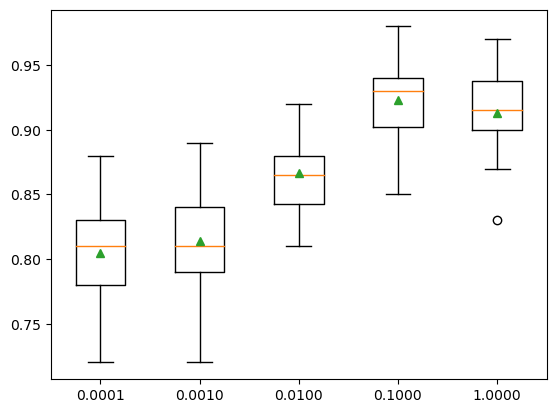

In [37]:
# Plot
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# Number of Samples

This is controlled by the ```subsample``` parameter. This parameter refers to the portion of training examples that are used for each tree. By default it is 1.0, which means that all examples are used.

In [38]:
# Imports
from numpy import arange
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from matplotlib import pyplot

In [39]:
# get a list of models to evaluate
def get_models():
    models = dict()
    for i in arange(0.1, 1.1, 0.1):
        key = '%.1f' % i
        models[key] = XGBClassifier(subsample=i)
    return models

# evaluate a give model using cross-validation
def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

In [40]:
X, y = get_dataset()
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>0.1 0.876 (0.027)
>0.2 0.912 (0.033)
>0.3 0.917 (0.032)
>0.4 0.925 (0.026)
>0.5 0.928 (0.027)
>0.6 0.926 (0.024)
>0.7 0.925 (0.031)
>0.8 0.928 (0.028)
>0.9 0.928 (0.025)
>1.0 0.925 (0.028)


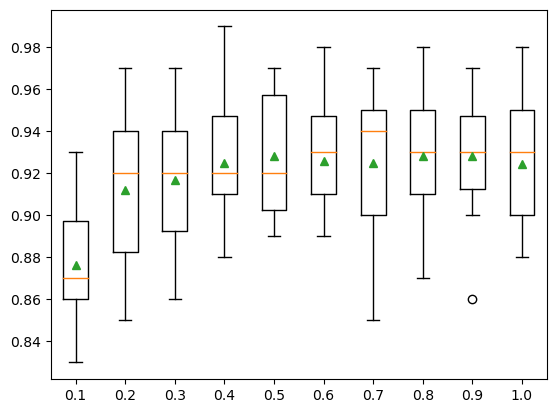

In [41]:
# Plot
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# Number of Features

Given by the ```colsample_bytree``` parameter. The parameter is the portion of features to be used. By default it is 1.0, which means all the features.

In [42]:
# Imports
from numpy import arange
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from matplotlib import pyplot

In [43]:
# get a list of models to evaluate
def get_models():
    models = dict()
    for i in arange(0.1, 1.1, 0.1):
        key = '%.1f' % i
        models[key] = XGBClassifier(colsample_bytree=i)
    return models

# evaluate a give model using cross-validation
def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

In [44]:
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>0.1 0.840 (0.029)
>0.2 0.911 (0.029)
>0.3 0.920 (0.030)
>0.4 0.925 (0.029)
>0.5 0.926 (0.027)
>0.6 0.930 (0.025)
>0.7 0.929 (0.022)
>0.8 0.929 (0.026)
>0.9 0.929 (0.025)
>1.0 0.925 (0.028)


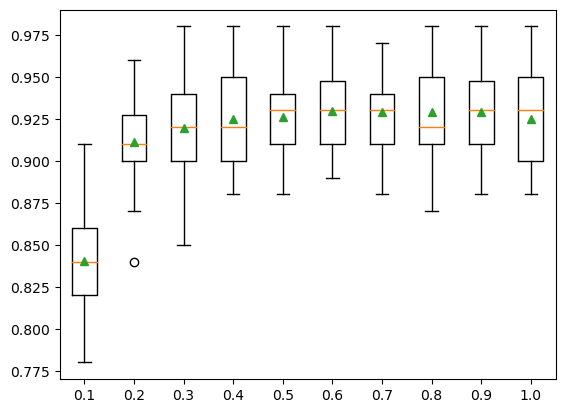

In [45]:
# Plot
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()